In [1]:
from __future__ import print_function
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
#matplotlib.rcParams['figure.figsize']= (20.0, 10.0) # larger image


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]

matplotlib version: 3.3.3
pandas version: 1.1.4
numpy version: 1.19.4
seaborn version: 0.11.0


In [2]:
root_path = '../2-Run1'  # The path to the directory containing the systems

igbs = ['igb1', 'igb2', 'igb5', 'igb7', 'igb8']  # Each of the systems as named in their directory

ffs = ['ff94','ff96','ff98','ff99', 'ff99SB', 'ff99SBildn', 'ff99SBnmr', 'ff03.r1', 'ff14SB', \
       'ff14SBonlysc','ff14ipq','fb15','ff15ipq']  # The name of the state directories

filename_pattern = 'helicity.dat'  # The glob to match the data files to read

dfs = {}  # Mapping of system name to list of state DataFrames

igbff_all = []
for ff in ffs:
    #igbff_all = []
    for igb in igbs:
        direc=igb + '_'+ ff
        # For each system and state, grab all the data files that match the glob
        file_glob = os.path.join(root_path, direc, filename_pattern)
        files = glob.glob(file_glob)
        for f in files:
            # Read each into a file to be put into a dict
            df = pd.read_csv(f, sep=r'\s+', skiprows=1, names=['Frame', 'Fraction helicity'])
            df[r'Time ($\mu$s)'] = df['Frame']/10000
            df['Helicity (%)'] = df['Fraction helicity']*100*33/31
            df['Mouving average']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).mean()
            df['igb'] = igb
            df['ff'] = ff
            df['ffigb'] = '{0} {1}'.format(ff, igb)
            df['igbff'] = '{0} {1}'.format(igb, ff)
            igbff_all.append(df)
df_total = pd.concat(igbff_all)
print(df_total.head())

   Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
0      1              0.848         0.0001     90.270968              NaN   
1      2              0.758         0.0002     80.690323              NaN   
2      3              0.879         0.0003     93.570968              NaN   
3      4              0.848         0.0004     90.270968              NaN   
4      5              0.879         0.0005     93.570968              NaN   

    igb    ff      ffigb      igbff  
0  igb1  ff94  ff94 igb1  igb1 ff94  
1  igb1  ff94  ff94 igb1  igb1 ff94  
2  igb1  ff94  ff94 igb1  igb1 ff94  
3  igb1  ff94  ff94 igb1  igb1 ff94  
4  igb1  ff94  ff94 igb1  igb1 ff94  


In [3]:
90.9*33/31

96.76451612903227

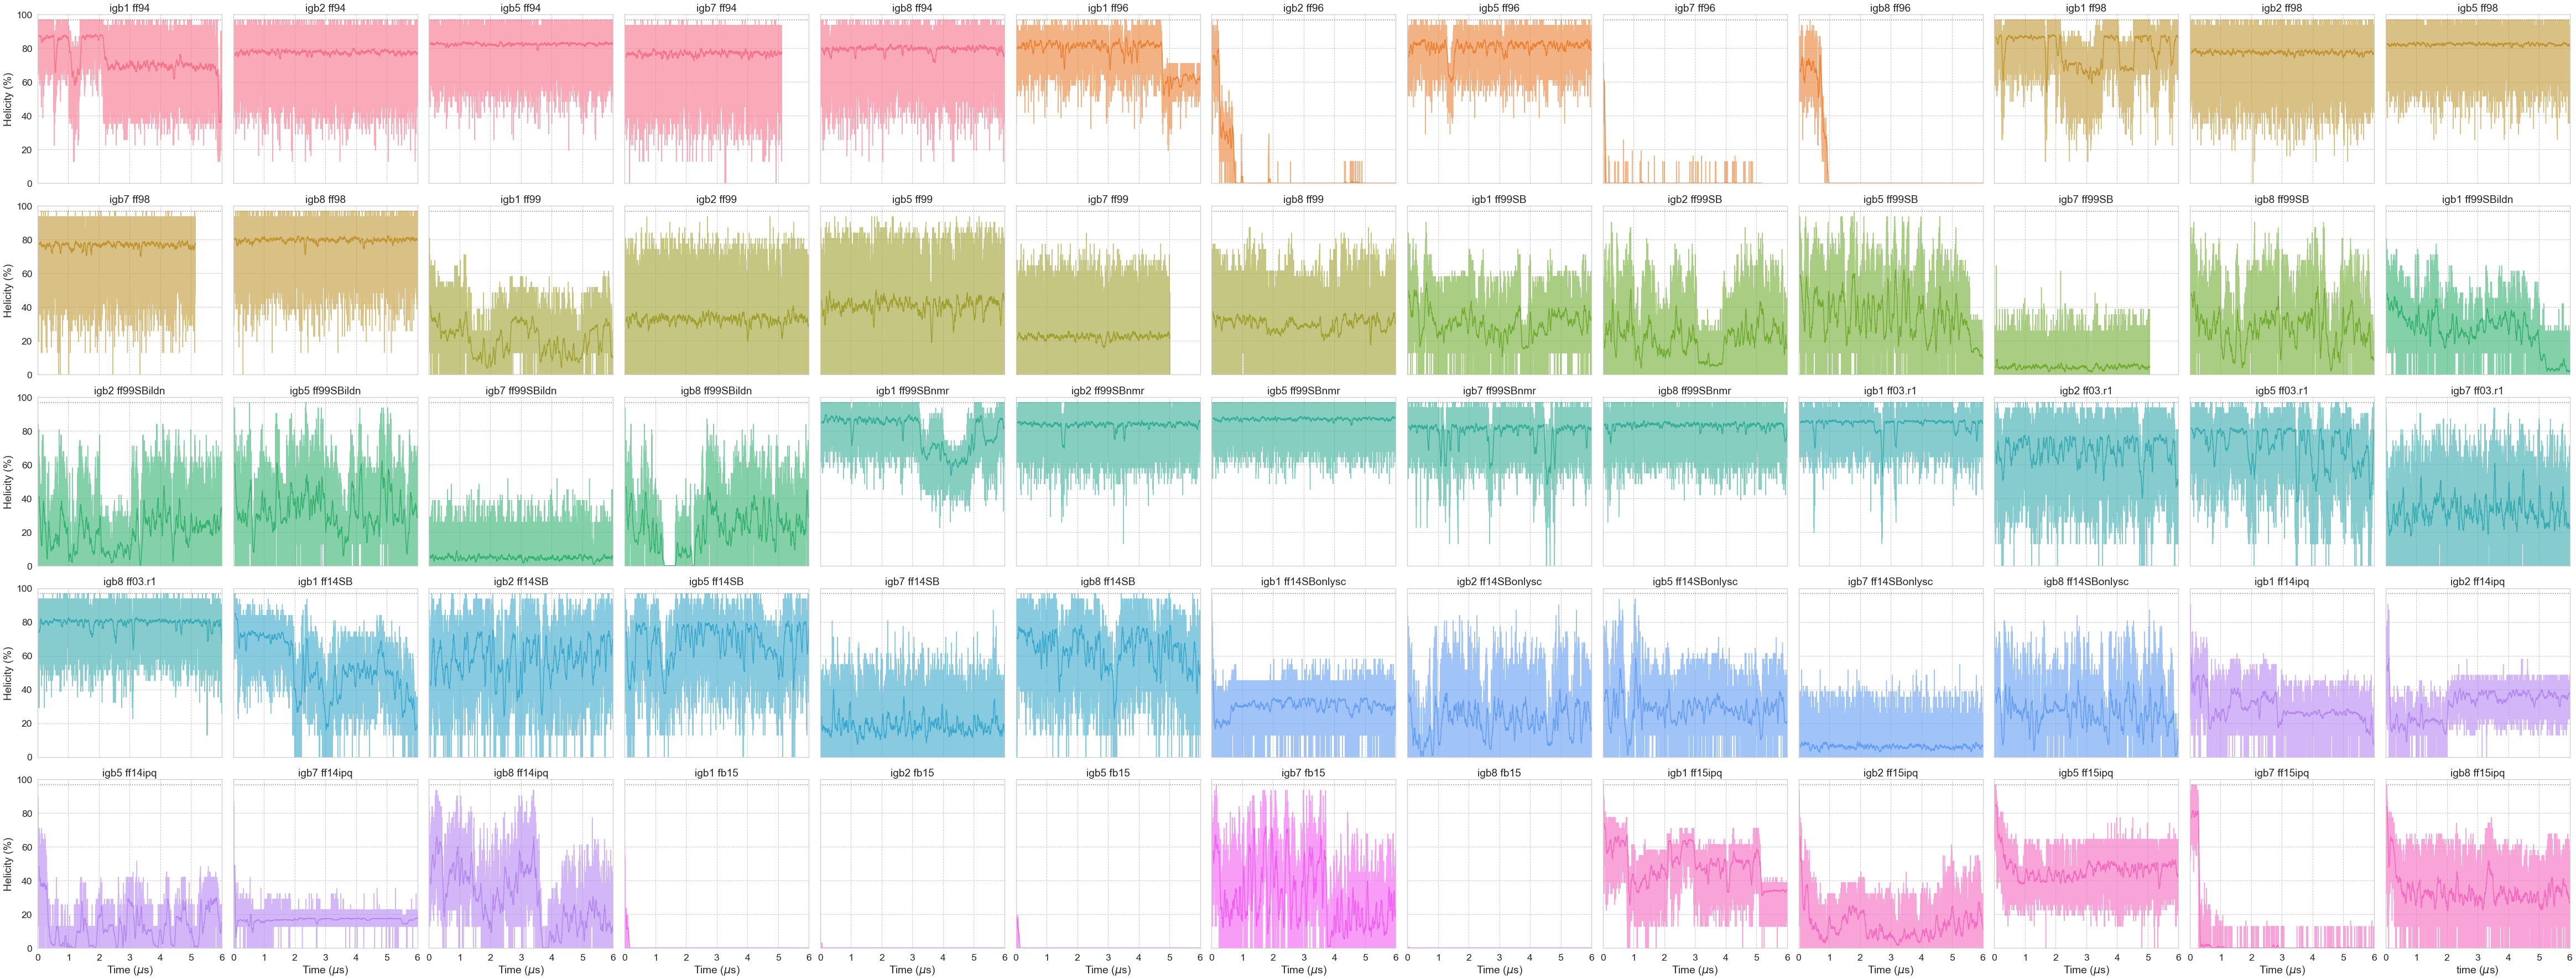

In [4]:
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_total, col="igbff", col_wrap=13, hue="ff", height=5, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.76, ls=":", c=".5") # 90.9*33/31

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average').set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=0.6).set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 6) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
#plt.ylabel('Percentage helicity (%)')
plt.savefig('./plots/helicity.pdf')
# plt.savefig('./plots/helicity.png', dpi=300)
plt.show()

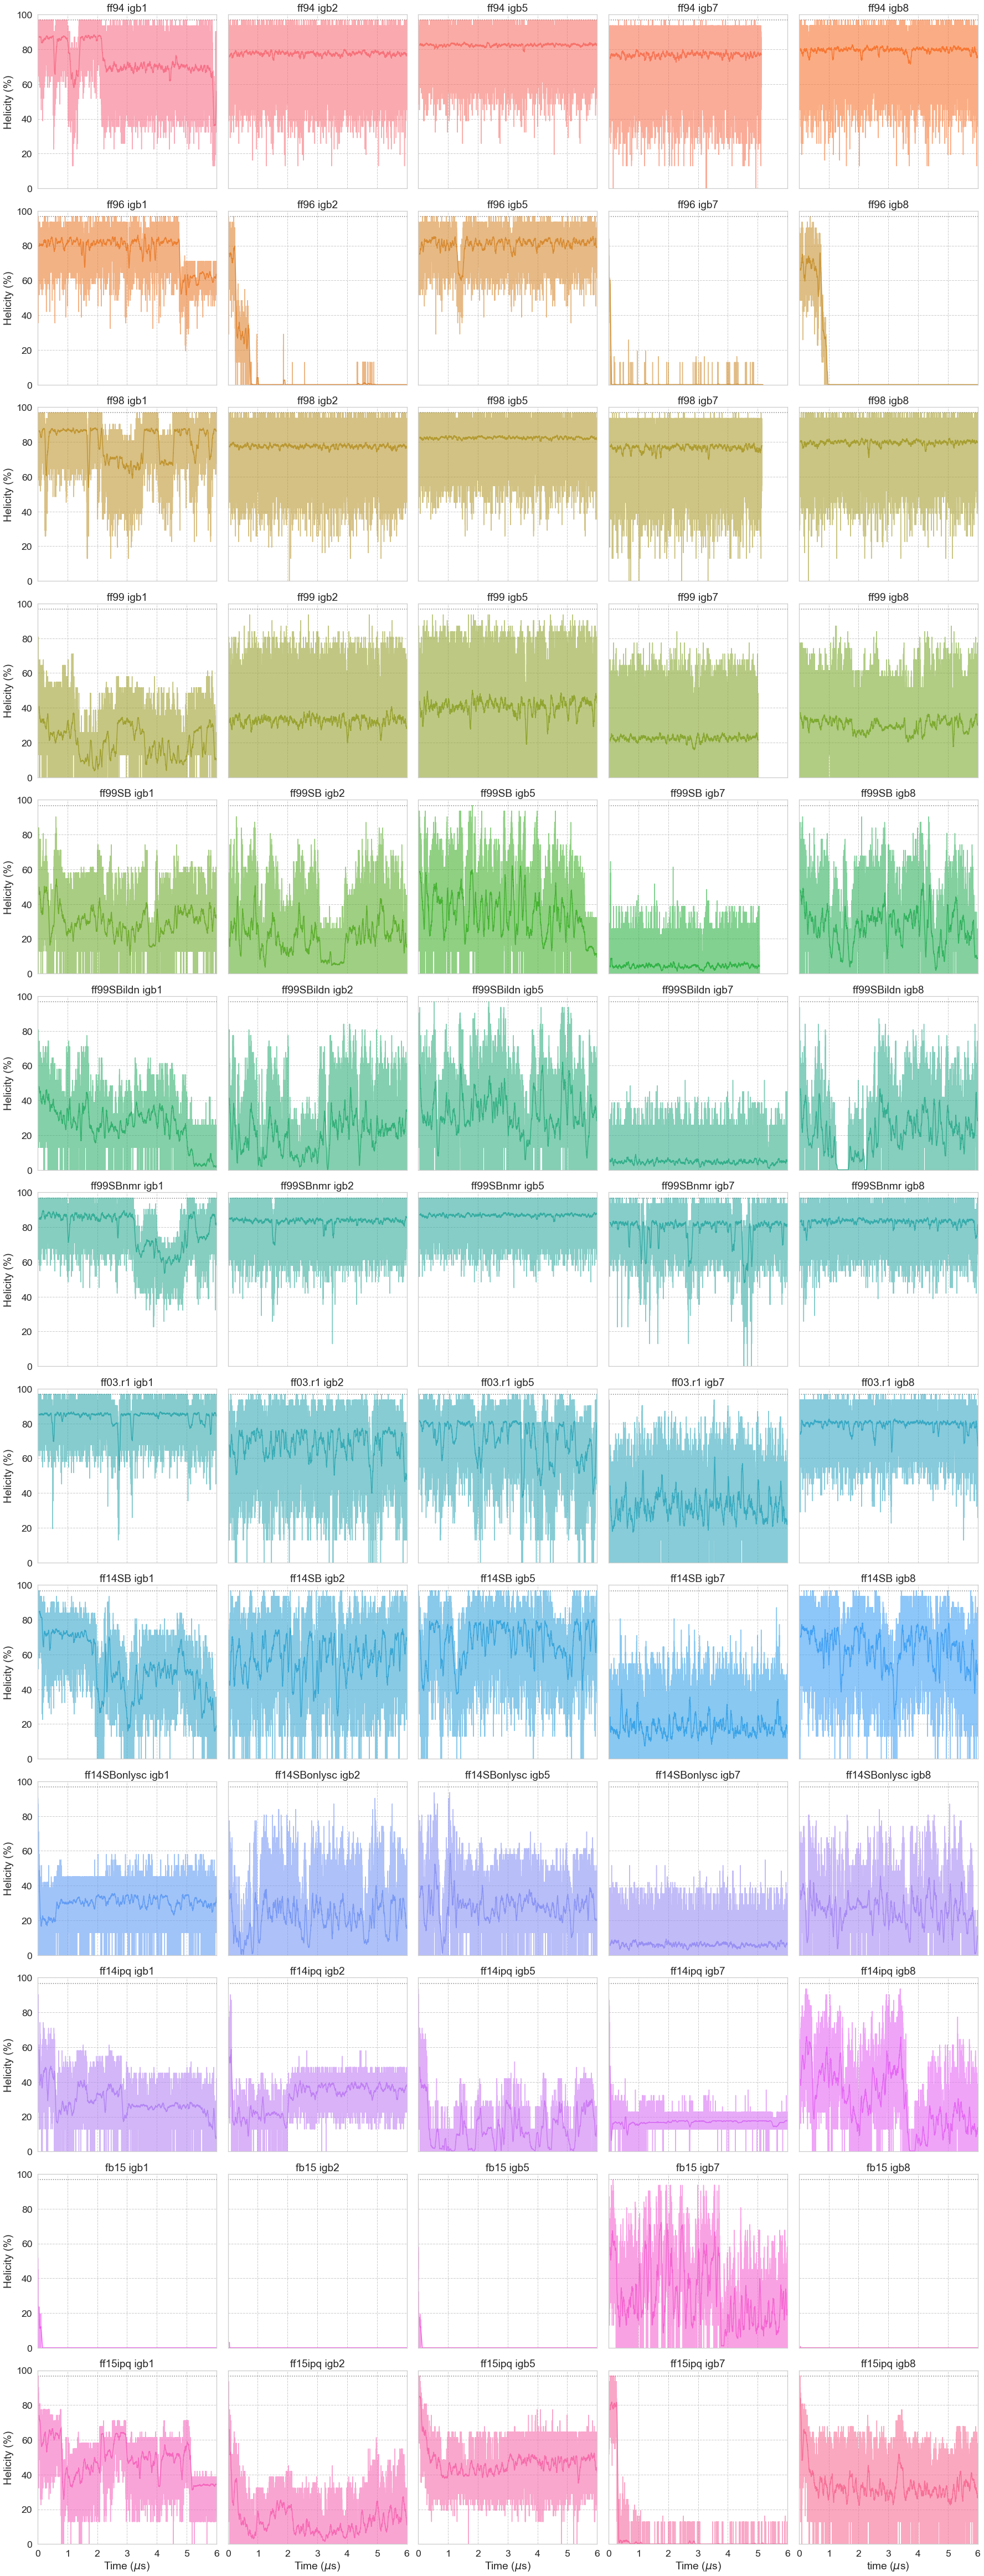

In [5]:
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_total, col="ffigb", col_wrap=5, hue="ffigb", height=5, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.76, ls=":", c=".5") # 90.9*33/31

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average').set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=0.6).set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 6) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
#plt.ylabel('Percentage helicity (%)')
plt.savefig('./plots/helicity2.pdf')
# plt.savefig('./plots/helicity2.png', dpi=300)
plt.show()

In [6]:
df_total

,Frame,Fraction helicity,Time ($\mu$s),Helicity (%),Mouving average,igb,ff,ffigb,igbff
0,1,0.848,0.0001,90.270968,NaN,igb1,ff94,ff94 igb1,igb1 ff94
1,2,0.758,0.0002,80.690323,NaN,igb1,ff94,ff94 igb1,igb1 ff94
2,3,0.879,0.0003,93.570968,NaN,igb1,ff94,ff94 igb1,igb1 ff94
3,4,0.848,0.0004,90.270968,NaN,igb1,ff94,ff94 igb1,igb1 ff94
4,5,0.879,0.0005,93.570968,NaN,igb1,ff94,ff94 igb1,igb1 ff94
...,...,...,...,...,...,...,...,...,...
59995,59996,0.242,5.9996,25.761290,27.079374,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq
59996,59997,0.152,5.9997,16.180645,27.066600,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq
59997,59998,0.394,5.9998,41.941935,27.124723,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq
59998,59999,0.485,5.9999,51.629032,27.176458,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq


In [7]:
temp=df_total.drop(columns=['Frame', 'Fraction helicity', r'Time ($\mu$s)', 'Mouving average', 'igb','ff' ])
temp

,Helicity (%),ffigb,igbff
0,90.270968,ff94 igb1,igb1 ff94
1,80.690323,ff94 igb1,igb1 ff94
2,93.570968,ff94 igb1,igb1 ff94
3,90.270968,ff94 igb1,igb1 ff94
4,93.570968,ff94 igb1,igb1 ff94
...,...,...,...
59995,25.761290,ff15ipq igb8,igb8 ff15ipq
59996,16.180645,ff15ipq igb8,igb8 ff15ipq
59997,41.941935,ff15ipq igb8,igb8 ff15ipq
59998,51.629032,ff15ipq igb8,igb8 ff15ipq


In [8]:
grouped=temp.groupby(['igbff'])
grouped

In [9]:
grouped.std()

,Helicity (%)
igbff,
igb1 fb15,3.059155
igb1 ff03.r1,7.873248
igb1 ff14SB,18.902845
igb1 ff14SBonlysc,9.518143
igb1 ff14ipq,11.359988
...,...
igb8 ff98,10.578163
igb8 ff99,14.371592
igb8 ff99SB,16.730622


In [10]:
grouped.mean()

,Helicity (%)
igbff,
igb1 fb15,0.321392
igb1 ff03.r1,83.940136
igb1 ff14SB,52.776490
igb1 ff14SBonlysc,30.057411
igb1 ff14ipq,28.604404
...,...
igb8 ff98,79.582866
igb8 ff99,29.912502
igb8 ff99SB,26.584784


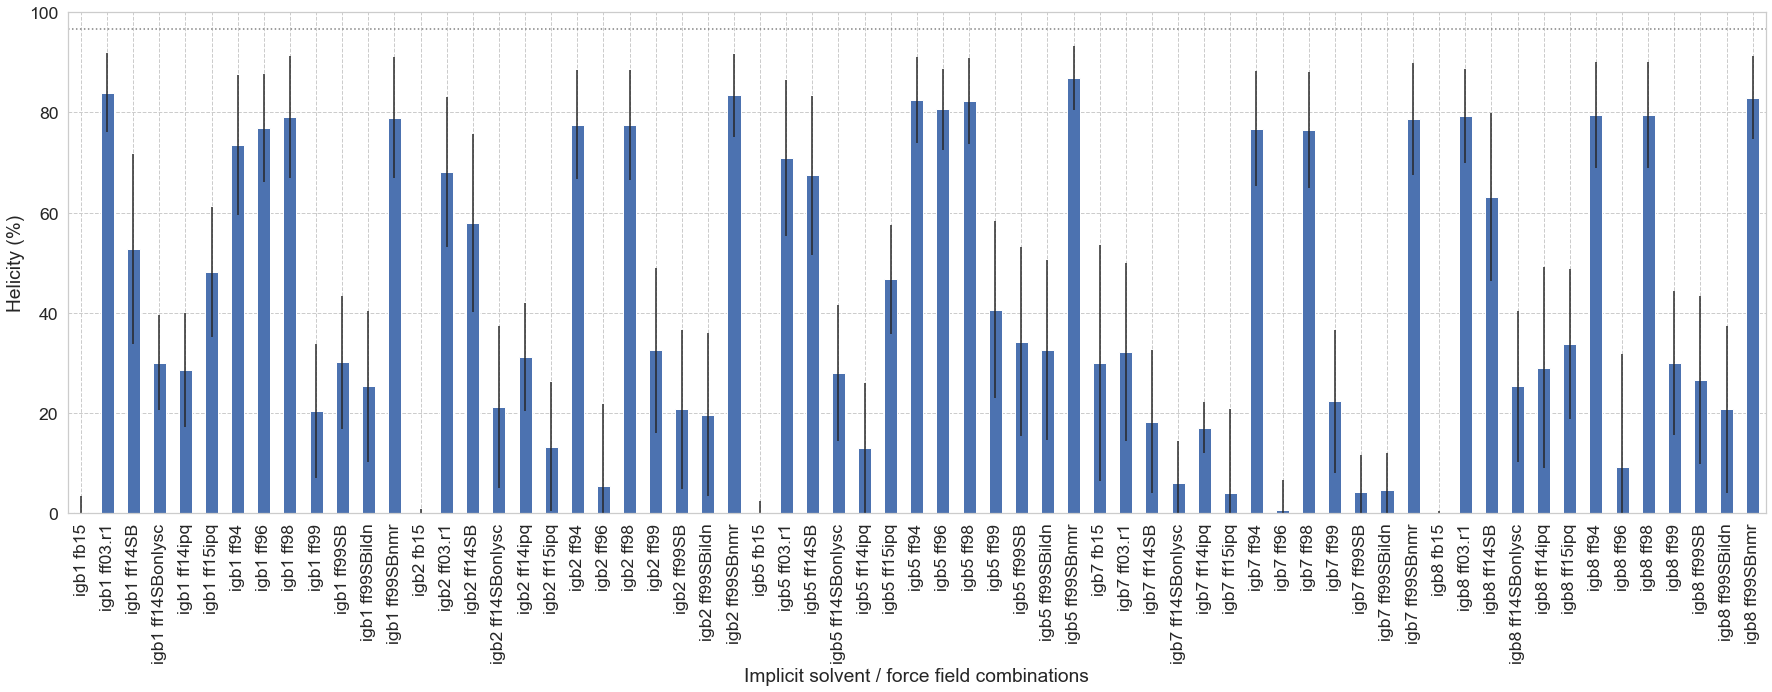

In [11]:
mean = grouped.mean()

errors = grouped.std()


ax=mean.plot(yerr=errors, kind='bar',figsize=(25,10), ylim=(0, 100), legend=False, rot=90 )
ax.set_ylabel('Helicity (%)')
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
plt.savefig('./helicity_avg.pdf')
plt.savefig('./helicity_avg.png')
#plt.show()

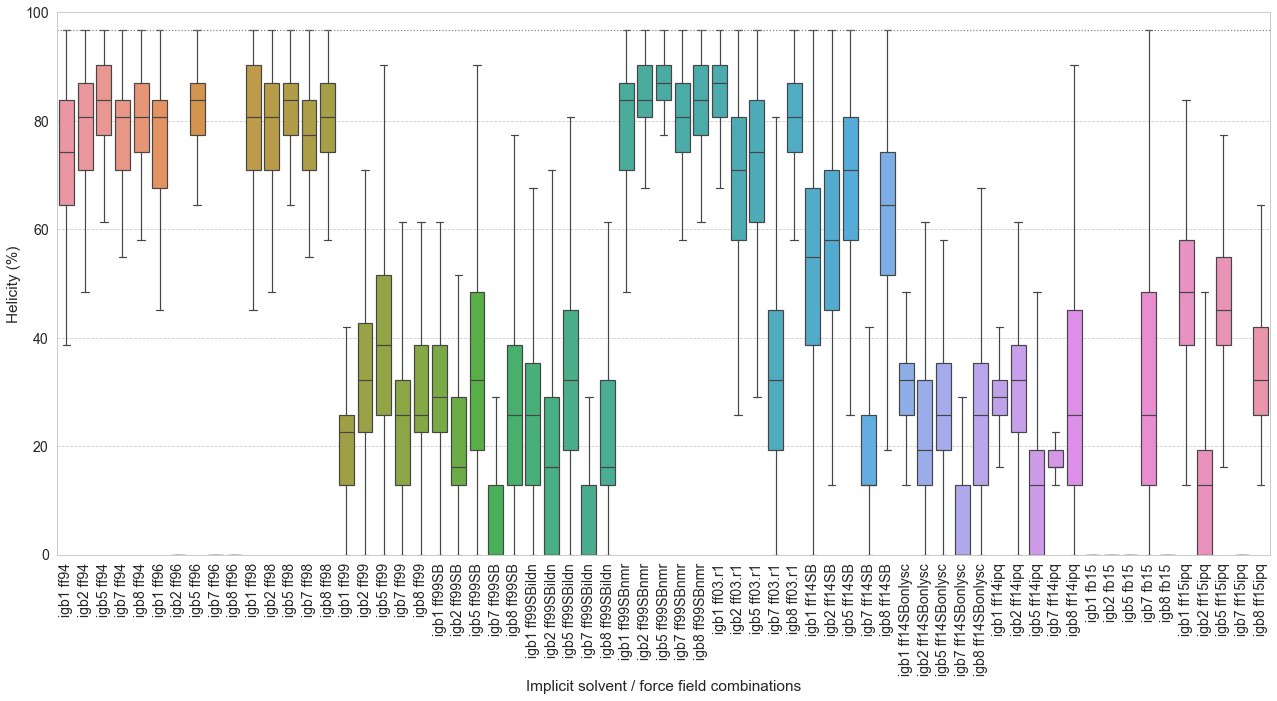

In [14]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

fig, axes = plt.subplots(figsize=(18, 10))

ax=sns.boxplot(x='igbff', y='Helicity (%)', data=df_total, fliersize=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
#plt.savefig('./helicity_boxplot.pdf')
plt.savefig('./helicity_boxplot.png', dpi=600)

fb15 igb1                 AxesSubplot(0.1,0.820213;0.097561x0.0797872)
fb15 igb2            AxesSubplot(0.217073,0.820213;0.097561x0.0797872)
fb15 igb5            AxesSubplot(0.334146,0.820213;0.097561x0.0797872)
fb15 igb8             AxesSubplot(0.45122,0.820213;0.097561x0.0797872)
ff03.r1 igb1         AxesSubplot(0.568293,0.820213;0.097561x0.0797872)
ff03.r1 igb2         AxesSubplot(0.685366,0.820213;0.097561x0.0797872)
ff03.r1 igb5         AxesSubplot(0.802439,0.820213;0.097561x0.0797872)
ff03.r1 igb8              AxesSubplot(0.1,0.724468;0.097561x0.0797872)
ff14SB igb1          AxesSubplot(0.217073,0.724468;0.097561x0.0797872)
ff14SB igb2          AxesSubplot(0.334146,0.724468;0.097561x0.0797872)
ff14SB igb5           AxesSubplot(0.45122,0.724468;0.097561x0.0797872)
ff14SB igb8          AxesSubplot(0.568293,0.724468;0.097561x0.0797872)
ff14SBonlysc igb1    AxesSubplot(0.685366,0.724468;0.097561x0.0797872)
ff14SBonlysc igb2    AxesSubplot(0.802439,0.724468;0.097561x0.0797872)
ff14SB

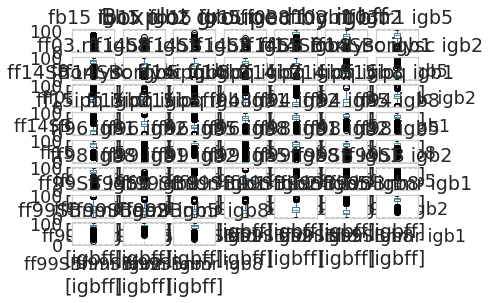

In [12]:
grouped.boxplot(by='igbff')

In [13]:
avg=mean.rename(columns={'Helicity (%)':'Mean'})
std=errors.rename(columns={'Helicity (%)':'Std'})
df1=pd.concat([avg,std], axis=1)
df1['igbff']=df1.index.astype('str') 
df1['Implicit solvent / Force field combination'] = df1['igbff'].astype('str') 
df1.dtypes

Mean                                          float64
Std                                           float64
igbff                                          object
Implicit solvent / Force field combination     object
dtype: object

In [14]:
plt.figure()
plt.errorbar(x= y=mean, yerr=errors)


SyntaxError: invalid syntax (<ipython-input-14-1d0f2cff0a76>, line 2)

In [ ]:
fig, axes = plt.subplots(1)
df1.plot( y='Mean', yerr='Std', ax=axes, kind='bar')

#axes.set(xlim=(3.0, 10.5) , ylim=(0, 1))

#lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc="lower left", borderaxespad=0., labelspacing=0.2)
axes.set_ylabel('Helicity (%)')